In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
samples_per_class = 5000
no_of_classes = 2

In [ ]:
noise_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise = noise_df.values.astype(float)


data_BBH_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/Final_BBH_Merged_Noise_Signal_Reduced_No_ABS.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)

In [ ]:
X = np.concatenate((noise, data_BBH, data_BNS), axis=0)

print(len(noise_df.index))
print(X)
print(X.shape)

5000
[[-1.64907037e-19 -4.29360853e-20  3.12423747e-20 ... -2.04472673e-19
  -1.81142159e-19 -1.51305791e-20]
 [ 9.92276697e-20 -1.80029547e-19 -1.23077317e-19 ...  6.22533943e-20
  -9.09674752e-20  2.12523082e-19]
 [-6.44325773e-21  5.41100166e-20 -6.99219049e-20 ... -1.41370244e-20
  -3.97475053e-20 -7.86069176e-20]
 ...
 [-3.23880911e-21 -7.34737312e-21  1.11265679e-20 ... -3.75220314e-20
   3.05405540e-20 -7.12104955e-20]
 [-2.26903379e-19  4.35581982e-20 -6.56942361e-20 ... -6.74037998e-20
   5.64279348e-20 -1.39437967e-19]
 [-9.73289950e-20  8.23111862e-20 -1.72899438e-20 ...  6.34110814e-20
   3.22702001e-20  1.48113480e-20]]
(15000, 16384)


In [ ]:
# Alternate way of creating y for the dataset
 
y = [int(i/samples_per_class) for i in range(samples_per_class*no_of_classes)]
y = tf.keras.utils.to_categorical(y)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# print(X)

In [ ]:
X = np.expand_dims(X, axis=-1)
print(X.shape)
print(X)

(15000, 16384, 1)
[[[-1.64907037e-19]
  [-4.29360853e-20]
  [ 3.12423747e-20]
  ...
  [-2.04472673e-19]
  [-1.81142159e-19]
  [-1.51305791e-20]]

 [[ 9.92276697e-20]
  [-1.80029547e-19]
  [-1.23077317e-19]
  ...
  [ 6.22533943e-20]
  [-9.09674752e-20]
  [ 2.12523082e-19]]

 [[-6.44325773e-21]
  [ 5.41100166e-20]
  [-6.99219049e-20]
  ...
  [-1.41370244e-20]
  [-3.97475053e-20]
  [-7.86069176e-20]]

 ...

 [[-3.23880911e-21]
  [-7.34737312e-21]
  [ 1.11265679e-20]
  ...
  [-3.75220314e-20]
  [ 3.05405540e-20]
  [-7.12104955e-20]]

 [[-2.26903379e-19]
  [ 4.35581982e-20]
  [-6.56942361e-20]
  ...
  [-6.74037998e-20]
  [ 5.64279348e-20]
  [-1.39437967e-19]]

 [[-9.73289950e-20]
  [ 8.23111862e-20]
  [-1.72899438e-20]
  ...
  [ 6.34110814e-20]
  [ 3.22702001e-20]
  [ 1.48113480e-20]]]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01) #, random_state=1

In [ ]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(14850, 16384, 1) (150, 16384, 1) (14850, 3) (150, 3)


In [ ]:
model = Sequential()

model.add(Conv1D(16, 16, input_shape = (16384,1)))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(32, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(64, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(128, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Flatten())
model.add(Dense(7808))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100) #validation_data=(X_val, y_val)

Epoch 1/100
117/117 [==============================] - 21s 65ms/step - loss: 1.0998 - accuracy: 0.3283
Epoch 2/100
117/117 [==============================] - 7s 61ms/step - loss: 1.0990 - accuracy: 0.3251
Epoch 3/100
117/117 [==============================] - 7s 61ms/step - loss: 1.0988 - accuracy: 0.3336
Epoch 4/100
117/117 [==============================] - 7s 61ms/step - loss: 1.0987 - accuracy: 0.3331
Epoch 5/100
117/117 [==============================] - 7s 61ms/step - loss: 1.0986 - accuracy: 0.3331
Epoch 6/100
117/117 [==============================] - 7s 61ms/step - loss: 1.0987 - accuracy: 0.3271
Epoch 7/100
117/117 [==============================] - 7s 61ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 8/100
117/117 [==============================] - 7s 61ms/step - loss: 1.0987 - accuracy: 0.3342
Epoch 9/100
117/117 [==============================] - 7s 61ms/step - loss: 1.0987 - accuracy: 0.3277
Epoch 10/100
117/117 [==============================] - 7s 61ms/step - loss: 1.09

In [ ]:
# import ctypes
# history = tf.keras.callbacks.History()
# history = ctypes.cast(0x7ff21a33f650, ctypes.py_object).value

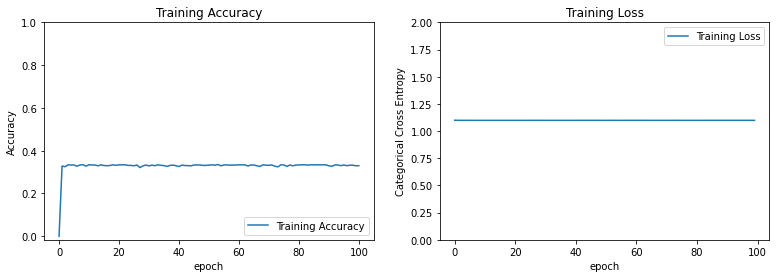

In [ ]:
acc = [0.] + history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()